## Explorium Data Science Home Assignment

### Rachael Stone

#### 12/20/2021

## Data Wrangle and Preprocessing

In [1]:
import datetime
import numpy as np
from numpy import cos, sin, arcsin, sqrt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from math import radians

In [2]:
# Read in data
data_df= pd.read_csv('data.csv')
print(data_df.shape)
data_df

(1092007, 7)


,Pickup Datetime,Price,Pickup Long,Pickup Lat,Dropoff Long,Dropoff Lat,Passenger Number
0,2014-02-19 07:22:00.000000740,12.50,-73.986430,40.760465,-73.988990,40.737075,1
1,2014-12-06 20:36:22.000000800,4.00,-73.979815,40.751902,-73.979446,40.755481,1
2,2014-02-19 16:03:00.000000160,5.50,-73.976075,40.752422,-73.981082,40.759285,1
3,2015-06-21 21:46:34.000000100,22.54,-74.010483,40.717667,-73.985771,40.660366,1
4,2015-01-11 03:15:38.000000100,58.00,-73.983330,40.738720,-73.933197,40.847225,1
...,...,...,...,...,...,...,...
1092002,2014-04-23 19:47:00.000000287,10.00,-73.980087,40.764892,-73.989557,40.757127,3
1092003,2015-02-26 14:47:47.000000600,7.00,-73.982101,40.736214,-73.999100,40.731556,1
1092004,2014-09-30 12:36:00.000000180,13.50,-73.976300,40.775957,-73.992147,40.751052,1
1092005,2014-12-06 23:04:28.000000200,10.50,-73.981063,40.764125,-73.979259,40.781857,2


### EDA

In [3]:
data_df.dtypes

Pickup Datetime      object
Price               float64
Pickup Long         float64
Pickup Lat          float64
Dropoff Long        float64
Dropoff Lat         float64
Passenger Number      int64
dtype: object

#### Pickup Datetime

2014-01-01 00:00:26.000000300    1
2014-01-01 00:01:00.000000320    1
2014-01-01 00:01:00.000000390    1
2014-01-01 00:01:00.000000970    1
2014-01-01 00:01:00.000000980    1
                                ..
2015-06-30 23:53:49.000000300    1
2015-06-30 23:55:51.000000700    1
2015-06-30 23:56:00.000000100    1
2015-06-30 23:56:50.000000100    1
2015-06-30 23:59:03.000000400    1
Name: Pickup Datetime, Length: 1091580, dtype: int64


<AxesSubplot:>

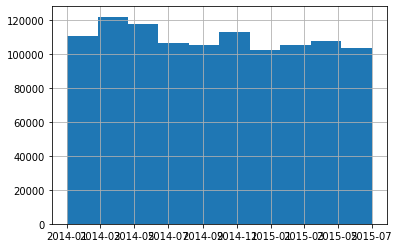

In [4]:
#explore Pickup Datetime variable
data_df['Pickup Datetime'] = pd.to_datetime(data_df['Pickup Datetime'])
print(data_df['Pickup Datetime'].value_counts().sort_index())
data_df['Pickup Datetime'].hist()
#dates look good

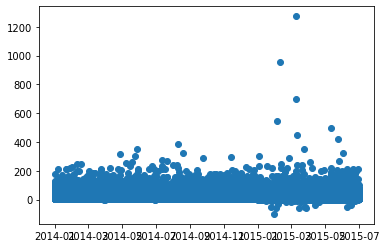

In [5]:
# plot datetime vs. price
plt.scatter(data_df['Pickup Datetime'],data_df['Price'])

#### Price

-100.00     1
-62.00      1
-60.00      1
-57.33      1
-53.69      1
           ..
 495.00     1
 542.83     1
 698.16     1
 952.00     1
 1273.31    1
Name: Price, Length: 1744, dtype: int64


<AxesSubplot:>

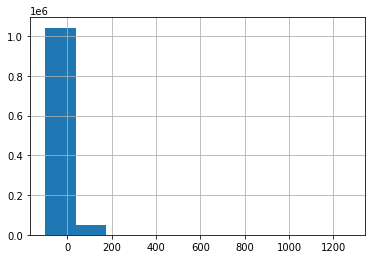

In [6]:
#explore Price variable
print(data_df['Price'].value_counts().sort_index())
data_df['Price'].hist()
#there are some 0 prices, negative prices and a few really high values

In [7]:
#If I used an IQR calculation what would the outer bounds of my data that is "allowed"
print("Highest allowed",data_df['Price'].mean() + 3*data_df['Price'].std())
print("Lowest allowed",data_df['Price'].mean() - 3*data_df['Price'].std())

Highest allowed 47.357899036060594
Lowest allowed -21.462362670451206


#### Pickup Long

-121.914810        1
-109.362038        1
-108.202955        1
-80.408781         1
-78.152138         1
               ...  
-65.701523         1
-65.234275         1
-60.880020         1
-48.136074         1
 0.000000      20868
Name: Pickup Long, Length: 109574, dtype: int64


<AxesSubplot:>

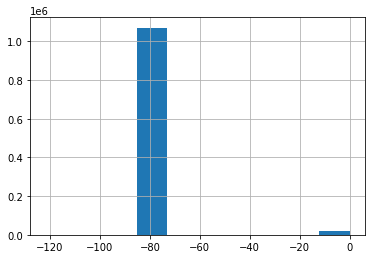

In [8]:
#explore Pickup Long variable
print(data_df['Pickup Long'].value_counts().sort_index())
data_df['Pickup Long'].hist()

# There are some 0 longitudes and then looks to range from -120 (as far west as Nevada) to -50 (the middle of the Atlantic Ocean). 


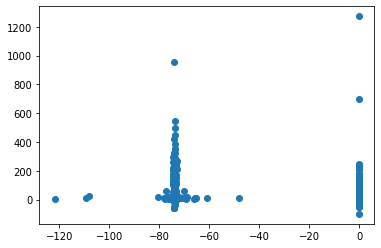

In [9]:
# plot pickup long vs. price
plt.scatter(data_df['Pickup Long'],data_df['Price'])

#### Pickup Lat

-19.721222        1
 0.000000     20868
 5.540077         1
 32.483467        1
 33.301123        1
              ...  
 46.209961        1
 47.245836        1
 47.267397        1
 48.741180        1
 55.375143        1
Name: Pickup Lat, Length: 146132, dtype: int64


<AxesSubplot:>

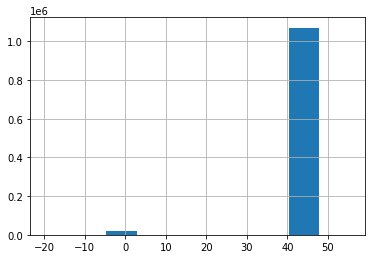

In [10]:
#explore Pickup Lat variable
print(data_df['Pickup Lat'].value_counts().sort_index())
data_df['Pickup Lat'].hist()

# There are some 0 latitudes and then looks to range from 60 to -20. 
#It does not seem likely that someone took a ride to central america or even further south.


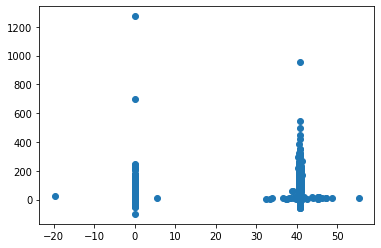

In [11]:
# plot pickup lat vs. price
plt.scatter(data_df['Pickup Lat'],data_df['Price'])

#### Dropoff Long

-714.400000        1
-121.915237        1
-108.202955        1
-94.433679         1
-79.036439         1
               ...  
-65.234275         1
-64.456134         1
-60.353933         1
-56.311580         1
 0.000000      20810
Name: Dropoff Long, Length: 132866, dtype: int64


<AxesSubplot:>

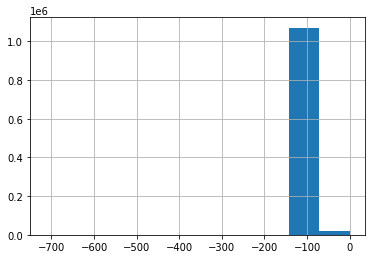

In [12]:
#explore Dropoff Long variable
print(data_df['Dropoff Long'].value_counts().sort_index())
data_df['Dropoff Long'].hist()
# there are some natural breaks in longitude that may help determine outliers

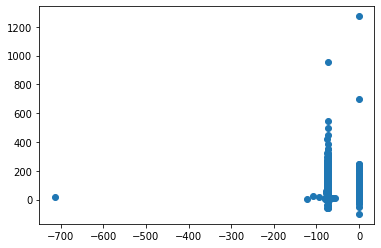

In [13]:
# Plot Drop off Long vs. Price
plt.scatter(data_df['Dropoff Long'],data_df['Price'])


#### Dropoff Lat

-19.721222        1
 0.000000     20810
 4.050000         1
 4.080650         1
 31.560196        1
              ...  
 45.341914        3
 46.788974        1
 47.244756        1
 47.311358        1
 48.741180        1
Name: Dropoff Lat, Length: 177837, dtype: int64


<AxesSubplot:>

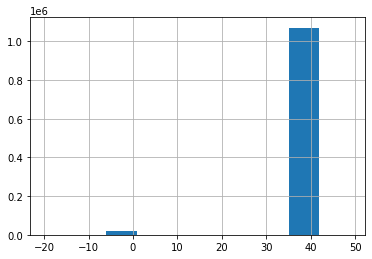

In [14]:
#explore Dropoff Lat variable
print(data_df['Dropoff Lat'].value_counts().sort_index())
data_df['Dropoff Lat'].hist()
# there are some natural breaks in latitude that may help determine outliers

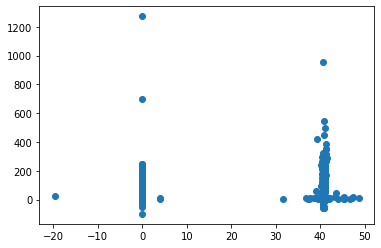

In [15]:
#Any crazy Lattitudes different than the others? Outside of New York?
plt.scatter(data_df['Dropoff Lat'],data_df['Price'])


#### Passenger Number

0       198
1    769363
2    153505
3     46151
4     21987
5     60718
6     40082
7         1
9         2
Name: Passenger Number, dtype: int64


<AxesSubplot:>

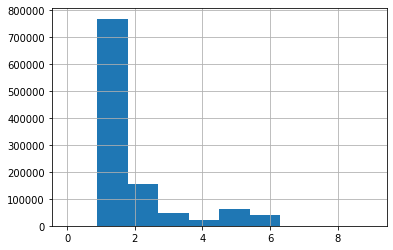

In [16]:
#explore Passenger Number variable
print(data_df['Passenger Number'].value_counts().sort_index())
data_df['Passenger Number'].hist()
#numbers of passengers seems plausible (maybe with a commuter van, etc.), 0 passengers - not possible

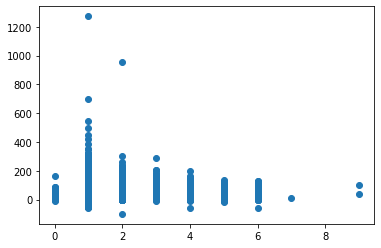

In [17]:
#Plot passenger number vs. price
plt.scatter(data_df['Passenger Number'],data_df['Price'])


### Processing

2014-01-01 00:00:26.000000300    1
2014-01-01 00:01:00.000000320    1
2014-01-01 00:01:00.000000390    1
2014-01-01 00:01:00.000000970    1
2014-01-01 00:01:00.000000980    1
                                ..
2015-06-30 23:53:49.000000300    1
2015-06-30 23:55:51.000000700    1
2015-06-30 23:56:00.000000100    1
2015-06-30 23:56:50.000000100    1
2015-06-30 23:59:03.000000400    1
Name: Pickup Datetime, Length: 1091580, dtype: int64


<AxesSubplot:>

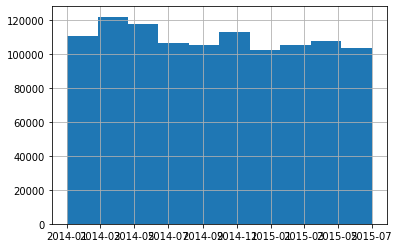

In [18]:
# convert datatime to integers
# week ends and week days

data_df['Pickup Datetime'] = pd.to_datetime(data_df['Pickup Datetime'])
print(data_df['Pickup Datetime'].value_counts().sort_index())
data_df['Pickup Datetime'].hist()
#dates look good

In [19]:
#convert datetime to integers variables
data_df['Hour'] = data_df['Pickup Datetime'].apply(lambda time: time.hour)
data_df['Month'] = data_df['Pickup Datetime'].apply(lambda time: time.month)
data_df['Day of Week'] = data_df['Pickup Datetime'].apply(lambda time: time.dayofweek)
data_df['Year'] = data_df['Pickup Datetime'].apply(lambda t: t.year)
data_df['Date'] = data_df['Pickup Datetime'].apply(lambda t: t.day)
data_df

In [20]:
# # data_df['Day of Week'] = data_df[(data_df['Day of Week'] == 5) & (data_df[(data_df['Day of Week'] == 6)]
# #instead of indivudal days of the week - convert to weekday and weekends - I think this will be more telling
# data_df['Day of Week'] = data_df['Day of Week'].replace([1,2,3,4,5,6,7],[1,1,1,1,2,2,1])
# # this variable change didn't help in model performance

In [22]:
# #add US federal holidays to dataframe
# cal = calendar()
# holidays = cal.holidays(start = data_df['Pickup Datetime'].min(), end = data_df['Pickup Datetime'].max())
# data_df['Pickup Datetime'] =  pd.to_datetime(data_df['Pickup Datetime']).dt.normalize()
# data_df['Holiday'] = data_df['Pickup Datetime'].isin(holidays)*1
# # I added holidays to dataframe but it didn't seem to improve my metrics

In [23]:
# How to handle zeros
#from the EDA above I have determined that I will not include 0 values in these variables
data_df = data_df[data_df['Price'] != 0]
data_df = data_df[data_df['Pickup Long'] != 0]
data_df = data_df[data_df['Pickup Lat'] != 0]
data_df = data_df[data_df['Dropoff Long'] != 0]
data_df = data_df[data_df['Dropoff Lat'] != 0]
print(len(data_df))
data_df

1069086


,Pickup Datetime,Price,Pickup Long,Pickup Lat,Dropoff Long,Dropoff Lat,Passenger Number,Hour,Month,Day of Week,Year,Date
0,2014-02-19 07:22:00.000000740,12.50,-73.986430,40.760465,-73.988990,40.737075,1,7,2,2,2014,19
1,2014-12-06 20:36:22.000000800,4.00,-73.979815,40.751902,-73.979446,40.755481,1,20,12,5,2014,6
2,2014-02-19 16:03:00.000000160,5.50,-73.976075,40.752422,-73.981082,40.759285,1,16,2,2,2014,19
3,2015-06-21 21:46:34.000000100,22.54,-74.010483,40.717667,-73.985771,40.660366,1,21,6,6,2015,21
4,2015-01-11 03:15:38.000000100,58.00,-73.983330,40.738720,-73.933197,40.847225,1,3,1,6,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1092002,2014-04-23 19:47:00.000000287,10.00,-73.980087,40.764892,-73.989557,40.757127,3,19,4,2,2014,23
1092003,2015-02-26 14:47:47.000000600,7.00,-73.982101,40.736214,-73.999100,40.731556,1,14,2,3,2015,26
1092004,2014-09-30 12:36:00.000000180,13.50,-73.976300,40.775957,-73.992147,40.751052,1,12,9,1,2014,30
1092005,2014-12-06 23:04:28.000000200,10.50,-73.981063,40.764125,-73.979259,40.781857,2,23,12,5,2014,6


In [24]:
# Aret there any Nulls?
data_df[data_df.isna().any(axis=1)]

,Pickup Datetime,Price,Pickup Long,Pickup Lat,Dropoff Long,Dropoff Lat,Passenger Number,Hour,Month,Day of Week,Year,Date


In [25]:
# Any outliers? Should they be included or capped off? windorized?
# Usually I might use an IQR calculation or windorize some values to determine statistically what are outliers or cap values off
# but there seem to be some natural breaks that might be more intuative determiners of outliers in this situation
data_df = data_df[data_df['Price'] > 0]

data_df = data_df[data_df['Pickup Long'] < 0]
data_df = data_df[data_df['Pickup Long'] > -150]

data_df = data_df[data_df['Pickup Lat'] > 30]

data_df = data_df[data_df['Dropoff Long'] < 0]
data_df = data_df[data_df['Dropoff Long'] > -150]

data_df = data_df[data_df['Dropoff Lat'] > 30]

data_df
# This has dropped about 30,000 rows. This is small in comparison to the total dataset


,Pickup Datetime,Price,Pickup Long,Pickup Lat,Dropoff Long,Dropoff Lat,Passenger Number,Hour,Month,Day of Week,Year,Date
0,2014-02-19 07:22:00.000000740,12.50,-73.986430,40.760465,-73.988990,40.737075,1,7,2,2,2014,19
1,2014-12-06 20:36:22.000000800,4.00,-73.979815,40.751902,-73.979446,40.755481,1,20,12,5,2014,6
2,2014-02-19 16:03:00.000000160,5.50,-73.976075,40.752422,-73.981082,40.759285,1,16,2,2,2014,19
3,2015-06-21 21:46:34.000000100,22.54,-74.010483,40.717667,-73.985771,40.660366,1,21,6,6,2015,21
4,2015-01-11 03:15:38.000000100,58.00,-73.983330,40.738720,-73.933197,40.847225,1,3,1,6,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1092002,2014-04-23 19:47:00.000000287,10.00,-73.980087,40.764892,-73.989557,40.757127,3,19,4,2,2014,23
1092003,2015-02-26 14:47:47.000000600,7.00,-73.982101,40.736214,-73.999100,40.731556,1,14,2,3,2015,26
1092004,2014-09-30 12:36:00.000000180,13.50,-73.976300,40.775957,-73.992147,40.751052,1,12,9,1,2014,30
1092005,2014-12-06 23:04:28.000000200,10.50,-73.981063,40.764125,-73.979259,40.781857,2,23,12,5,2014,6


#### Distance

In [26]:
#long and lat are not great variables in a linear model because their distance is represented by comparing 2 variables to 2 different variables
# I want to transform these 4 variables into 1 total variale representing distance. This can be done with long and lat by the haversine formula

def haversine(row):
    lon1 = row['Pickup Long']
    lat1 = row['Pickup Lat']
    lon2 = row['Dropoff Long']
    lat2 = row['Dropoff Lat']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km


In [27]:
data_df['Distance'] = data_df.apply(lambda row: haversine(row), axis=1)
data_df

,Pickup Datetime,Price,Pickup Long,Pickup Lat,Dropoff Long,Dropoff Lat,Passenger Number,Hour,Month,Day of Week,Year,Date,Distance
0,2014-02-19 07:22:00.000000740,12.50,-73.986430,40.760465,-73.988990,40.737075,1,7,2,2,2014,19,2.608136
1,2014-12-06 20:36:22.000000800,4.00,-73.979815,40.751902,-73.979446,40.755481,1,20,12,5,2014,6,0.398928
2,2014-02-19 16:03:00.000000160,5.50,-73.976075,40.752422,-73.981082,40.759285,1,16,2,2,2014,19,0.871366
3,2015-06-21 21:46:34.000000100,22.54,-74.010483,40.717667,-73.985771,40.660366,1,21,6,6,2015,21,6.699343
4,2015-01-11 03:15:38.000000100,58.00,-73.983330,40.738720,-73.933197,40.847225,1,3,1,6,2015,11,12.774031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092002,2014-04-23 19:47:00.000000287,10.00,-73.980087,40.764892,-73.989557,40.757127,3,19,4,2,2014,23,1.174706
1092003,2015-02-26 14:47:47.000000600,7.00,-73.982101,40.736214,-73.999100,40.731556,1,14,2,3,2015,26,1.522049
1092004,2014-09-30 12:36:00.000000180,13.50,-73.976300,40.775957,-73.992147,40.751052,1,12,9,1,2014,30,3.072210
1092005,2014-12-06 23:04:28.000000200,10.50,-73.981063,40.764125,-73.979259,40.781857,2,23,12,5,2014,6,1.976310


0.000000       6268
0.000084          1
0.000084          1
0.000084          1
0.000084          1
               ... 
1269.332957       1
1303.730585       1
1477.626051       1
1781.159632       1
3040.720975       1
Name: Distance, Length: 1062562, dtype: int64


<AxesSubplot:>

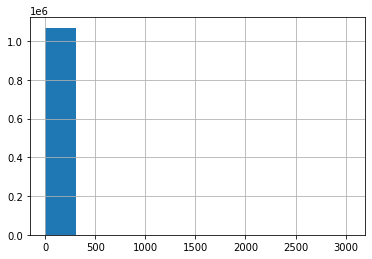

In [28]:
print(data_df['Distance'].value_counts().sort_index())
data_df['Distance'].hist()
#Distance has some outliers

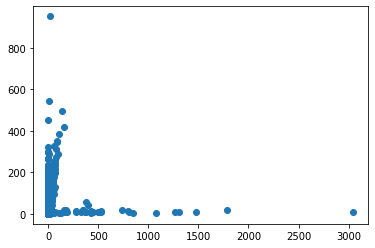

In [29]:
#Plot Distnace number vs. price
plt.scatter(data_df['Distance'],data_df['Price'])

In [30]:
# With the plot from above I can tell that there are a lot more outliers going to the effect the model than I first anticipated
# A standard IQR calculation would rid the model of more data than I think necessary
# IQR calculations
print("Highest allowed",data_df['Distance'].mean() + 3*data_df['Distance'].std())
print("Lowest allowed",data_df['Distance'].mean() - 3*data_df['Distance'].std())

#After looking at the graph I could get rid of those observations with a Distance less than 250 and still keep 
#over 99% of the data and have the makings of what could be a really good model.
# number of observations total
print(len(data_df))
print(len(data_df[data_df['Distance'] < 250]))
# % of observations less than 250 in Distance
print(len(data_df[data_df['Distance'] < 250])/len(data_df))

# only include those that havea distance less than 250km
data_df = data_df[data_df['Distance'] < 250]


Highest allowed 21.760945148287902
Lowest allowed -14.896894416429022
1068979
1068952
0.9999747422540574


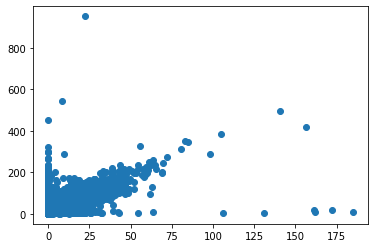

In [31]:
#Plot Distnace number vs. price
plt.scatter(data_df['Distance'],data_df['Price'])

## Train and Test

In [32]:
X = data_df.drop(['Price','Pickup Datetime','Pickup Long', 'Pickup Lat','Dropoff Long', 'Dropoff Lat'], axis = 1)
Y = data_df['Price']
X.head(10)


,Passenger Number,Hour,Month,Day of Week,Year,Date,Distance
0,1,7,2,2,2014,19,2.608136
1,1,20,12,5,2014,6,0.398928
2,1,16,2,2,2014,19,0.871366
3,1,21,6,6,2015,21,6.699343
4,1,3,1,6,2015,11,12.774031
5,1,8,3,3,2015,12,0.806193
6,6,10,7,2,2014,16,0.430600
7,6,9,5,3,2014,1,1.447049
8,4,9,1,4,2014,17,1.112720
9,6,18,4,1,2014,29,3.730865


In [33]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2, random_state = 10)
print(len(x_train))
print(len(x_test))
x_train

855161
213791


,Passenger Number,Hour,Month,Day of Week,Year,Date,Distance
426743,1,15,8,2,2014,27,1.435449
654466,1,19,6,1,2014,17,0.633811
952796,1,15,4,2,2015,22,6.056337
970576,1,14,6,2,2015,24,2.377325
745537,5,20,3,4,2015,27,3.957164
...,...,...,...,...,...,...,...
726233,1,0,6,1,2015,9,7.588221
981238,1,14,2,5,2014,8,0.059950
821668,1,16,2,4,2015,13,3.638205
631141,1,23,3,5,2015,14,1.918167


## Model

In [34]:
# Linear Regression
clf = LinearRegression()
clf_fit = clf.fit(x_train,y_train)
predicted = clf_fit.predict(x_test)
predicted 

array([ 4.06585426,  6.39572451, 10.67178255, ..., 20.97490498,
       10.12739341,  7.64784462])

In [35]:
#Prints y-intercept
print(clf.intercept_)

#beta coefficents in same order as passed
print(clf.coef_)

-545.8967679640377
[ 1.93651320e-02  1.50100194e-02  5.31959820e-02 -8.77995881e-02
  2.72859077e-01  1.17563833e-03  2.61454317e+00]


#### Validation

In [36]:
# r squared value
clf.score(x_test,y_test)

0.7891330779541338

In [37]:
#result mae
print(metrics.mean_absolute_error(y_test, predicted))
#mse
print(metrics.mean_squared_error(y_test, predicted)) # remember outliers really effect this measurement
#rmse
np.sqrt(metrics.mean_squared_error(y_test, predicted))

2.5433425469952793
26.420876417098743


5.140124163587758

### Feature Selection

In [38]:
#feature importance values
importances = pd.DataFrame(list(zip(list(X.columns.values), clf.coef_)))
importances.columns = ['col', 'importance']
importances = importances.sort_values('importance', ascending=False).reset_index()
importances

,index,col,importance
0,6,Distance,2.614543
1,4,Year,0.272859
2,2,Month,0.053196
3,0,Passenger Number,0.019365
4,1,Hour,0.015010
5,5,Date,0.001176
6,3,Day of Week,-0.087800


In [39]:
# Correlation Matrix
corr_variables =  data_df.drop(['Pickup Datetime','Pickup Long', 'Pickup Lat','Dropoff Long', 'Dropoff Lat'], axis = 1)
# calculate correlation matrix
corr_df = corr_variables.corr()
corr_df

,Price,Passenger Number,Hour,Month,Day of Week,Year,Date,Distance
Price,1.000000,0.013729,-0.014113,0.024507,-0.004568,0.003761,0.002902,0.882988
Passenger Number,0.013729,1.000000,0.011366,-0.000350,0.023904,-0.004718,0.001329,0.013103
Hour,-0.014113,0.011366,1.000000,-0.000716,-0.083877,0.000664,0.004550,-0.027239
Month,0.024507,-0.000350,-0.000716,1.000000,-0.018615,-0.412400,-0.010307,0.015395
Day of Week,-0.004568,0.023904,-0.083877,-0.018615,1.000000,0.007704,0.012564,0.013136
Year,0.003761,-0.004718,0.000664,-0.412400,0.007704,1.000000,-0.001184,-0.001464
Date,0.002902,0.001329,0.004550,-0.010307,0.012564,-0.001184,1.000000,0.002554
Distance,0.882988,0.013103,-0.027239,0.015395,0.013136,-0.001464,0.002554,1.000000


<AxesSubplot:>

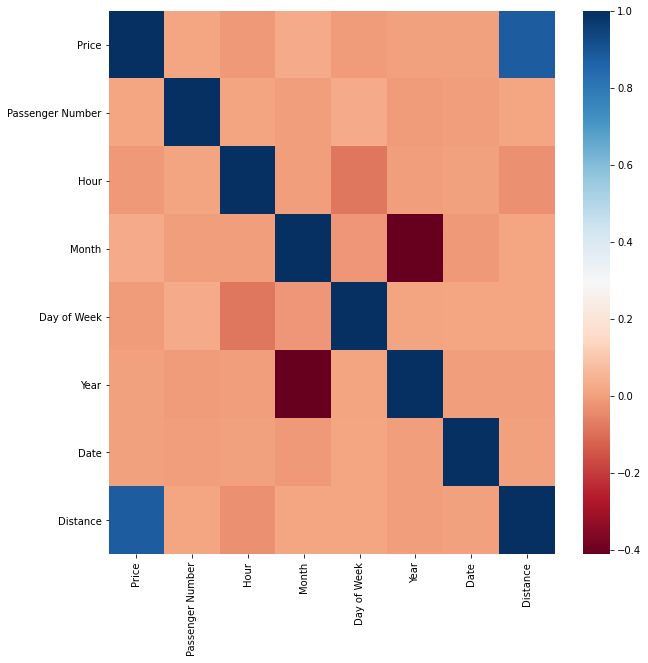

In [40]:
# create heathmap to visualize correlation matrix
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(corr_df, cmap='RdBu')

In [41]:
# Rerun model after feature selection - or excluding the day of week variable
# start by removing features that don't help model from dfs
X = data_df.drop(['Price','Pickup Datetime', 'Pickup Long', 'Dropoff Long', 'Year', 'Passenger Number','Hour','Day of Week'], axis = 1)
Y = data_df['Price']

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2, random_state = 10)
print(len(x_train))
print(len(x_test))
x_train

# Linear Regression
clf = LinearRegression()
clf_fit = clf.fit(x_train,y_train)
predicted = clf_fit.predict(x_test)
predicted 



855161
213791


array([ 4.27900052,  6.26488483, 10.51876453, ..., 20.58539305,
        9.62242632,  7.60405059])

In [42]:
# r squared value
clf.score(x_test,y_test)

0.7895476944471905

In [43]:
#Prints y-intercept
print(clf.intercept_)

#beta coefficents in same order as passed
print(clf.coef_)

135.5478594664069
[ 9.86832317e+00 -1.31017138e+01  3.80159369e-02  9.50450477e-04
  2.61586906e+00]


In [44]:
#result mae
print(metrics.mean_absolute_error(y_test, predicted))
#mse
print(metrics.mean_squared_error(y_test, predicted))
#rmse
np.sqrt(metrics.mean_squared_error(y_test, predicted))
# with these metrics there was no improvement excluding any variables after looking at the feature importance values

2.538469651393393
26.368926443071246


5.1350682997474575

## Explorium Data Science Home Assignment 
**Questions for discussion:**

**1. Do you see any limitations/abnormalities in the data? What issues are these likely to cause in the analysis, and how would you address them?**


'Pickup Datetime' did not seem to have any abnormalities visible. Although, this is not a friendly format and with have to be altered.

The 'Price' variable had negative values. These values don't make sense in this model. There are some outliers that are extremely high but I will include them at this time because they are at least "possible".

The variable 'Pickup Long' had some values that were 0 (which is unusual) and some longitudes that range from -120 (as far west as Nevada) to -50 (the middle of the Atlantic Ocean). This is unusual. Without being able to gain more context I believe that these observations shouldn't be included. With most variables I would usually determine the outliers by using a IQR calculation and potentially not include these observations. This variable in the data set has some natural breaks that make determining outliers more intuitive and potentially keep more data. I only included longitudes in the range 0 to -150 degrees.

I removed 0 latitudes in the variable 'Pickup Lat'. The location of 0 latitudes is nowhere near New York. These values also range from 60 to -20. This is also unusual. It does not seem likely that someone took a ride to Central America or even further south. Once again, using some natural breaks in the data I have determined what should be included and what data may be considered outliers. I only included latitudes greater than 30 degrees after viewing these natural breaks in the data.

For the 'Dropoff Long' variable, I removed values that were determined to be 0 and anything outside of the intuitive range. To keep boundaries consistent I have only included longitudes in the range of 0 to -150 degrees (just like the pick up long).
 
'Dropoff Lat' does not include any observations that are 0 either. I only included latitudes greater than 30 degrees (just like I have with the pickup lat).

The 'Number Passengers' variable is interesting. Without being able to gain additional context I will assume that if a ride has 0 passengers then they shouldn't be charged and therefore, they should be removed from the dataframe. There are a few observations that have a 'Number Passengers' variable that is very high (7 and 9 passengers) but it is possible in a commuter van, etc. I will include the high observations in 'Number Passengers' at this time.



**2. How would you approach building the model? What kind of model(s) would you expect to perform well? What objective/loss functions, and performance metrics make sense here, in context of the business use case?**

I like to approach modeling with very simple (appropriate) models first and then increase in complexity. If a simpler model is just as accurate as a complex model then I like to use the simpler, more interpretable model. I believe interoperability has some value along with accuracy and other validation measurements.

A simple regression may do well in this situation due to the output variable ('Price') being a continuous variable and we have multiple independent variables. I will perform a multivariate linear regression for this exercise but if I were to spend more time on this project I would then perform a decision tree regression and then a random forest regression and compare my results to determine which model has the best metrics for this problem. A KNN using zip codes or ‘zones’ may also be an interesting alternative.

The performance metrics that make sense for this model would be r squared (or the amount of variability explained in the model), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).




**3. Are there any additional features that would be helpful in constructing the model?**

I converted the datetime variable and split it to create 5 different features - hour, day, day of the week, month and year. These features could help account for different patterns in that occur during the day, week, etc

I also looked into including US federal holidays and converting date information to weekdays/weekends and neither of these features had added any predictive accuracy to the model.

I created the feature 'Distance' by using the Haversine formula on the pickup and dropoff lat/long values to calculate the distance between the two points in kms. After I looked at this newly calculated ‘Distance’ vs. Price I was able to identify a few more points that could be defined as outliers. I decided to exclude several more data points to increase the models overall accuracy while still including a lot of values that may be capped or not included using a simple IQR calculation of outliers.



**4. How would you select and identify the most predictive features in the model?** 

I am using a correlation matrix and feature importance values to help identify some of the most predictive features. 
Distance is by far the most predictive feature in the model. The correlation matrix could tell us this before the use of the model and the features importance after the model was run.



**5. Please run a predictive model and briefly assess its performance.**

After running a linear regression, the metrics are as follows:

r-squared- 0.789317759499137

MAE- 2.5399054346550116

MSE- 26.397736475425077

RMSE- 5.13787275780795


These metrics were not improved when I excluded variables with a low feature importance - this leads me to believe that their influence on the model is very limited and/or there are interactions between variables that help the model perform better (or have a higher absolute r squared value and lower MAE, MSE, and RMSE).


**6. What other data would be helpful to have in order to improve the model’s performance? If you could have any external data what would it be?**

Some variables of interest might be:
Drop off Datetime
Average Speed Limit for the ride
Days since Driver acquired licence
Is traffic as usual? Lower? Higher?
Weather at time of ride
Whether there was an accident on route or not
Whether they are local or tourists (or lat and long of home address)

**7. Great news! Explorium’s Research Team has found a data source - OpenStreetMap (OSM) - which they feel is likely to boost the model’s performance. This file contains the lat/long coordinates of various geographic points of interest, a full list of which you can find at https://wiki.openstreetmap.org/wiki/Map_features. The file itself is at
https://drive.google.com/file/d/1X8-HI6h1oSBQ5Ntk08qyNWzEm7geKUS4/view
At a high level - please provide some thoughts around how you could use this OSM data to add more richness to the ride-sharing data. What kind of data would you recommend adding to the core dataset, and how would you go about actually combining the datasets. (We’re interested in your approach and thought process on this
problem; actual merging of data and rerunning of models is not necessary. You may want to prove out your idea by showing how a small sample of the data would work in such a join.)**

I would add the lat/long of some of the more popular attractions in NYC, e.g. Ground Zero, Statue of Liberty, Brooklyn Bridge, Empire State Building, Rockefeller Center, etc. to the data. I would go about this by calculating the distance (as I did above between the pickup lat/long and dropoff lat/long above). I would use the Haversine formula between the pickup lat/long and the Attractions lat/long to calculate the total distance between the two points in kms. I would continue to do this between the pickup lat/long and other attractions that I am interested in. Therefore, there would be a column for each attraction of interest.


